findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

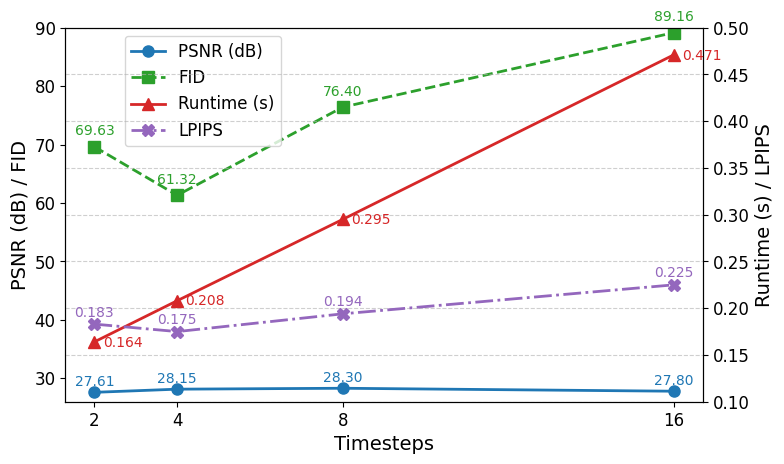

In [47]:
import matplotlib.pyplot as plt

# Data
parameters = [2, 4, 8, 16]
psnr = [27.608, 28.148, 28.304, 27.798]
fid = [69.626, 61.321, 76.401, 89.157]
lpips = [0.183, 0.175, 0.194, 0.225]
runtime = [0.164, 0.208, 0.295, 0.471]

# Initialize plot
# plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12
fig, ax = plt.subplots(figsize=(8, 4.8))

# Left Y-axis (PSNR & FID)
ax.set_xlabel('Timesteps', fontsize=14)
ax.set_ylabel('PSNR (dB) / FID', fontsize=14)
ax.set_xticks(parameters)

# PSNR plot
psnr_line, = ax.plot(parameters, psnr, color='#1f77b4', marker='o', 
                    markersize=8, linewidth=2, label='PSNR (dB)')
ax.set_ylim(26, 90)  # PSNR range

# FID plot (secondary axis)
# ax_fid = ax.twinx()
fid_line, = ax.plot(parameters, fid, color='#2ca02c', marker='s',
                       markersize=8, linewidth=2, linestyle='--', label='FID')

# Right Y-axis (Runtime & LPIPS)
ax_runtime = ax.twinx()
# ax_runtime.spines['right'].set_position(('outward', 60))

# Runtime plot
runtime_line, = ax_runtime.plot(parameters, runtime, color='#d62728', marker='^',
                               markersize=8, linewidth=2, label='Runtime (s)')
ax_runtime.set_ylabel('Runtime (s) / LPIPS', fontsize=14)
ax_runtime.set_ylim(0.1, 0.5)  # Runtime range

# LPIPS plot (secondary axis)
# ax_lpips = ax_runtime.twinx()
lpips_line, = ax_runtime.plot(parameters, lpips, color='#9467bd', marker='X',
                           markersize=8, linewidth=2, linestyle='-.', label='LPIPS')

# 合并图例
lines = [psnr_line, fid_line, runtime_line, lpips_line]
ax.legend(lines, [l.get_label() for l in lines], 
        loc='upper left', fontsize=12, bbox_to_anchor=(0.08, 1))

# 添加数值标注
for x, p, f, l, r in zip(parameters, psnr, fid, lpips, runtime):
    ax.text(x, p+1.1, f'{p:.2f}', ha='center', color='#1f77b4', fontsize=10)
    ax.text(x, f+2, f'{f:.2f}', ha='center', color='#2ca02c', fontsize=10)
    ax_runtime.text(x, l+0.008, f'{l:.3f}', ha='center', color='#9467bd', fontsize=10)
    ax_runtime.text(x+0.2, r-0.005, f'{r:.3f}', ha='left', color='#d62728', fontsize=10)

# plt.title('Multi-Metric Performance Comparison', fontsize=16, pad=20)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
# plt.savefig("a.png")

plt.savefig('timesteps.pdf', 
           dpi=300, 
           bbox_inches='tight',
           pad_inches=0.1,
           format='pdf',  # 可选png/svg/eps等
           transparent=True, 
           facecolor='white')
plt.show()